# Example 4.15 - Shear deformation of elastoplastic square

In [5]:
import numpy as np
from nlfem.hardening import combHard
import matplotlib.pyplot as plt

Text(0, 0.5, 'Shear stressm [MPa]')

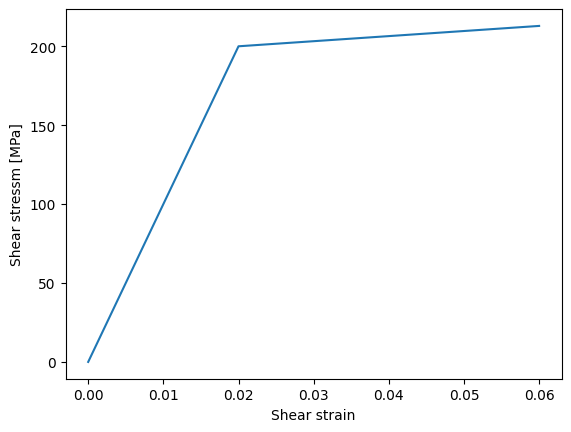

In [7]:
# 
Young = 24000
nu = 0.2
mu = Young / (2 * (1 + nu))
lambdaa = nu * Young / ( (1 + nu) * (1 - 2 * nu) )
beta = 0
H = 1000
sY = 200*np.sqrt(3)
mp = np.array([lambdaa, mu, beta, H, sY])
Iden = np.array([1,1,1,0,0,0])
D = 2 * mu * np.eye(6) + lambdaa * np.outer(Iden, Iden)
D[3, 3] = mu
D[4, 4] = mu
D[5, 5] = mu

stressN = np.zeros(6)
deps = np.zeros(6)
alphaN = np.zeros(6)
epN = 0

X = [0]
Y = [0]
for i in range(1, 16):
    deps[3] = 0.004
    stress, alpha, ep = combHard(mp, D, deps, stressN, alphaN, epN)
    X.append(i*deps[3])
    Y.append(stress[3])
    stressN = stress
    alphaN = alpha
    epN = ep

plt.plot(X, Y)
plt.xlabel("Shear strain")
plt.ylabel("Shear stressm [MPa]")
